In [39]:
import musicdb
import matplotlib.pyplot as plt

db = musicdb.MusicDB()

Database musicdb has already been existed.
Table echonest has already been existed.
Table millionsonglink has already been existed.
Table spotify has already been existed.
Table songs has already been existed.


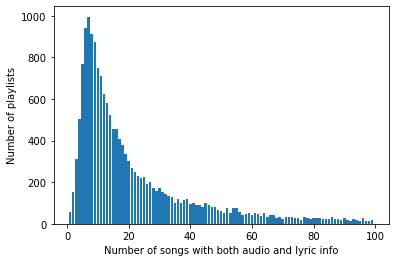

In [40]:
def visualize_echo_nest():
    sql_cmd_base = "SELECT COUNT(*) FROM {} WHERE ".format(db.echo_nest_table_name)
    query_cmd = "audio_lyric>={} and audio_lyric<{}"
    count = None
    pos = 1
    count_list = []
    pos_list = []
    while count is None or pos < 100:
        sql_cmd = sql_cmd_base + query_cmd.format(pos, pos + 1)
        my_cursor = db.execute_cmd(sql_cmd)
        for row in my_cursor:
            count = row[0]
            break
        count_list.append(count)
        pos_list.append(pos)
        pos += 1
        
    #print(count_list)
    #print(pos_list)
    
    # Plot
    plt.bar(pos_list, count_list)
    plt.xlabel('Number of songs with both audio and lyric info')
    plt.ylabel('Number of playlists')
    plt.show()
        
visualize_echo_nest()

In [41]:
# Get a counter by setting a threshold
def echo_nest_counter(thres):
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE audio_lyric>{}".format(db.echo_nest_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    count = 0
    for row in my_cursor:
        count = row[0]
        break
    count_all = 0
    sql_cmd = "SELECT COUNT(*) FROM {}".format(db.echo_nest_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        count_all = row[0]
        break
    print("There are {} ({} %) playlists with over {} audio and lyric".format(count, float(count/count_all)*100, thres))
    
echo_nest_counter(10)
echo_nest_counter(15)
echo_nest_counter(20)

There are 11202 (64.09566859300794 %) playlists with over 10 audio and lyric
There are 8311 (47.55392801968301 %) playlists with over 15 audio and lyric
There are 6431 (36.79693311209017 %) playlists with over 20 audio and lyric


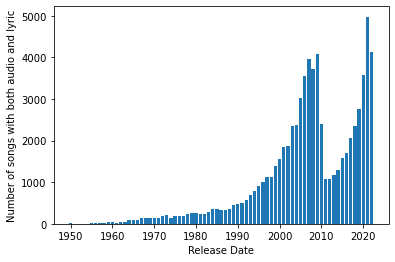

In [45]:
# visualize song table
def visualize_song_table():
    sql_cmd_base = "SELECT COUNT(*) FROM {} WHERE ".format(db.song_table_name)
    query_cmd = "release_date>='{}-01-01' and release_date<'{}-01-01' and audio=1 and lyric=1 and is_spotify=0"
    count = None
    pos = 1950
    count_list = []
    pos_list = []
    while count is None or pos < 2023:
        sql_cmd = sql_cmd_base + query_cmd.format(pos, pos + 1)
        my_cursor = db.execute_cmd(sql_cmd)
        for row in my_cursor:
            count = row[0]
            break
        count_list.append(count)
        pos_list.append(pos)
        pos += 1
        
    #print(count_list)
    #print(pos_list)
    
    # Plot
    plt.bar(pos_list, count_list)
    plt.xlabel('Release Date')
    plt.ylabel('Number of songs with both audio and lyric')
    plt.show()

visualize_song_table()

In [43]:
# Get a counter by setting a threshold
def song_table_counter(thres):
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE release_date>'{}-01-01' and audio=1 and lyric=1 and is_spotify=0".format(db.song_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    count = 0
    for row in my_cursor:
        count = row[0]
        break
    count_all = 0
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE audio=1 and lyric=1".format(db.song_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        count_all = row[0]
        break
    print("There are {} ({} %) songs released after {}-01-01 with audio and lyric".format(count, float(count/count_all)*100, thres))
    
song_table_counter(2015)
song_table_counter(2018)
song_table_counter(2020)

There are 23083 (29.19865916134337 %) songs released after 2015-01-01 with audio and lyric
There are 17762 (22.46790209347922 %) songs released after 2018-01-01 with audio and lyric
There are 12671 (16.02808171526153 %) songs released after 2020-01-01 with audio and lyric


In [33]:
# Info report for song table
def get_counter(sql_cmd):
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        return row[0]

# Unreliable
def get_song_table_info():
    # Number of unique track id with valid audio and lyric
    sql_cmd = "SELECT COUNT(DISTINCT trackid) FROM {} WHERE audio=1 and lyric=1".format(db.song_table_name)
    track_id_count = get_counter(sql_cmd)
    print("There are {} song with audio and lyric in the dataset".format(track_id_count))
    
get_song_table_info()

There are 75317 song with audio and lyric in the dataset


In [37]:
# find the intersection between music and lyric_raw folder
import os
dataset_root = 'E:/dataset/base'

def get_inter_music_lyric():
    music_path = dataset_root + '/' + 'music'
    lyric_path = dataset_root + '/' + 'lyric_raw'
    music_url_list = os.listdir(music_path)
    lyric_url_list = os.listdir(lyric_path)
    music_ids = [music.split('.')[0] for music in music_url_list]
    lyric_ids = [lyric.split('.')[0] for lyric in lyric_url_list]
    music_set = set(music_ids)
    lyric_set = set(lyric_ids)
    inter_set = music_set & lyric_set
    print("There are {} music and {} lyric, the intersection is {}".format(len(music_ids), len(lyric_ids), len(inter_set)))
    
get_inter_music_lyric()

There are 77536 music and 100287 lyric, the intersection is 62670
